### [Imports](#imports)  
### [Chargement du dataframe](#loading)    
### [Fonction de pré-traitement du jeu de données](#pre-traitement)  
### [Lémmatisation](#lemmatisation)  
### [Stemming](#stemming)
### [CountVectorizer avec Lémmatisation](#count_lem)  
### [CountVectorizer avec Stemming](#count_stem)  
### [TF-IDF avec Lémmatisation](#tfidf_lem)  
### [TF-IDF avec Stemming](#tfidf_stem)  
### [Rappel nombres de variables cible dans le dataframe](#rappel_target)  
### [Régression Logistique modèle de base (Countvectorizer avec Lémmatisation)](#log_count_lem)  
### [Régression Logistique modèle de base (Countvectorizer avec Stemming)](#log_count_stem)   
### [Régression Logistique modèle de base (TF-IDF avec Lémmatisation)](#log_tfidf_lem)  
### [Régression Logistique modèle de base (TF-IDF avec Stemming)](#log_tfidf_stem)  
### [Graphique AUC-ROC meilleur modèle](#best_model)
### [SHAP du meilleur modèle](#shap_best_model)
### [Tableau des scores](#score_board)  
### [Affichage de l'interface MLFlow](#mlflow)  
### [Conclusion](#conclusion)

 # <center><a id='imports'>Imports</a></center>

In [1]:
# Matplotlib
import matplotlib.pyplot as plt

# Pandas
import pandas as pd

# Sklearn
from sklearn.metrics import roc_curve, roc_auc_score

# Functions notebook
from functions.functions import *

# Shap
import shap
shap.initjs()

c:\Users\romai\anaconda3\envs\P07\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# <center><a id='loading'>Chargement du dataframe</a></center>

In [2]:
data = pd.read_csv("csv/data.csv")

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

 # <center><a id='pre-traitement'>Fonction de pré-traitement du jeu de données</a></center>

In [3]:
data["cleaned_tweet"] = data["tweet"]

In [4]:
data_copy = data.copy()

In [5]:
Stop_Words_list = stopwords.words("english")
tableau_score = []
# nltk.download('wordnet')

In [6]:
data["cleaned_tweet"] = data["cleaned_tweet"].apply(lambda x: clean_text(x))

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='lemmatisation'>Lémmatisation</a></center>

In [7]:
data['lemmatized_tweet'] = lemm_corpus(data['cleaned_tweet'])

# <center><a id='stemming'>Stemming</a></center>

In [8]:
data['stemmed_tweet'] = stem_corpus(data['cleaned_tweet'])

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='count_lem'>CountVectorizer avec Lémmatisation</a></center>

In [9]:
count_vec_lemmatised_dataframe, count_vec_features_lemmatised = vectoriser_count_vectoriser(data['lemmatized_tweet'])

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='count_stem'>CountVectorizer avec Stemming</a></center>

In [10]:
count_vec_stemmed_dataframe, count_vec_features_stemmed = vectoriser_count_vectoriser(data['stemmed_tweet'])

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='tfidf_lem'>TF-IDF avec Lémmatisation</a></center>

In [11]:
tfidf_dataframe_lemmatised, tfidf_features_lemmatised = vectoriser_tf_idf(data['lemmatized_tweet'])

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='tfidf_stem'>TF-IDF avec Stemming</a></center>

In [12]:
tfidf_dataframe_stemmed, tfidf_features_stemmed = vectoriser_tf_idf(data['stemmed_tweet'])

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='rappel_target'>Rappel nombres de variables cible dans le dataframe</a></center>

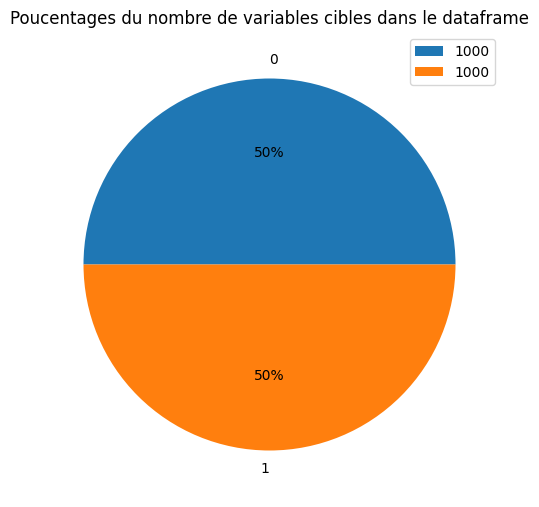

In [13]:
pie_chart_target(data["target"])

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='log_count_lem'>Régression Logistique modèle de base (Countvectorizer avec Lémmatisation)</a></center>

In [14]:
X_count_lem = count_vec_lemmatised_dataframe.values
y_count_lem = data["target"].values

In [15]:
X_train_count_lem, X_test_count_lem, X_val_count_lem, y_train_count_lem, y_test_count_lem, y_val_count_lem = train_test_val_split(X_count_lem, y_count_lem)

In [16]:
log_count_lem, log_pred_count_lem, log_count_lem_acc, time_training_count_stem, tableau_score = Logistic_regression_model("Régression Logistique Count Lemmatized", tableau_score, X_train_count_lem, X_test_count_lem, X_val_count_lem, y_train_count_lem, y_test_count_lem, y_val_count_lem )

2023/02/04 23:00:32 INFO mlflow.tracking.fluent: Experiment with name 'Régression Logistique Count Lemmatized' does not exist. Creating a new experiment.
2023/02/04 23:00:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\romai\anaconda3\envs\P07\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."


validation score :  0.665625
test score :  0.6975
Temps d'entraînement du modèle: 6.727823734283447


              precision    recall  f1-score   support

           0       0.70      0.69      0.69       200
           1       0.69      0.71      0.70       200

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400



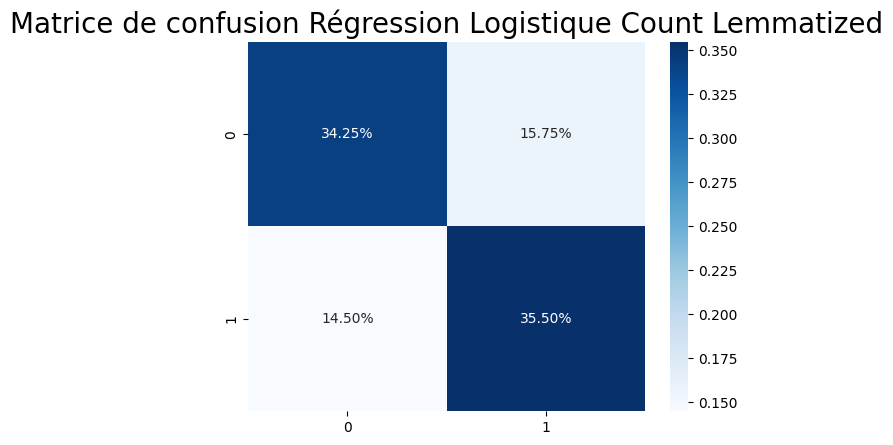

In [17]:
confusion_report_matrix("Matrice de confusion Régression Logistique Count Lemmatized", y_test_count_lem, log_pred_count_lem)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

 # <center><a id='log_count_stem'>Régression Logistique modèle de base (Countvectorizer avec Stemming)</a></center>

In [18]:
X_count_stem = count_vec_stemmed_dataframe.values
y_count_stem = data["target"].values

In [19]:
X_train_count_stem, X_test_count_stem, X_val_count_stem, y_train_count_stem, y_test_count_stem, y_val_count_stem = train_test_val_split(X_count_stem, y_count_stem)

In [20]:
log_count_stem, log_pred_count_stem, log_acc_count_stem, time_training_count_stem, tableau_score = Logistic_regression_model("Régression Logistique Count Stemmed", tableau_score, X_train_count_stem, X_test_count_stem, X_val_count_stem, y_train_count_stem, y_test_count_stem, y_val_count_stem)

2023/02/04 23:00:39 INFO mlflow.tracking.fluent: Experiment with name 'Régression Logistique Count Stemmed' does not exist. Creating a new experiment.


validation score :  0.6375
test score :  0.6875
Temps d'entraînement du modèle: 4.274446249008179


              precision    recall  f1-score   support

           0       0.69      0.68      0.68       200
           1       0.68      0.70      0.69       200

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.69      0.69      0.69       400



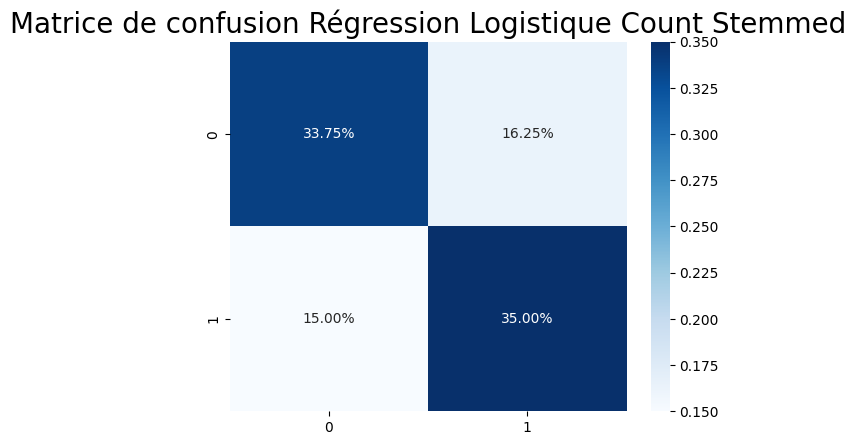

In [21]:
confusion_report_matrix("Matrice de confusion Régression Logistique Count Stemmed", y_test_count_stem, log_pred_count_stem)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='log_tfidf_lem'>Régression Logistique modèle de base (TF-IDF avec Lémmatisation)</a></center>

In [22]:
X_tfidf_lem = tfidf_dataframe_lemmatised.values
y_tfidf_lem = data["target"].values

In [23]:
X_train_tfidf_lem, X_test_tfidf_lem, X_val_tfidf_lem, y_train_tfidf_lem, y_test_tfidf_lem, y_val_tfidf_lem = train_test_val_split(X_tfidf_lem, y_tfidf_lem)

In [24]:
log_tfidf_lem, log_pred_tfidf_lem, log_acc_tfidf_lem, time_training_tfidf_lem, tableau_score = Logistic_regression_model("Régression Logistique TF-IDF Lemmatized", tableau_score, X_train_tfidf_lem, X_test_tfidf_lem, X_val_tfidf_lem, y_train_tfidf_lem, y_test_tfidf_lem, y_val_tfidf_lem)

2023/02/04 23:00:45 INFO mlflow.tracking.fluent: Experiment with name 'Régression Logistique TF-IDF Lemmatized' does not exist. Creating a new experiment.


validation score :  0.675
test score :  0.7075
Temps d'entraînement du modèle: 4.132565021514893


              precision    recall  f1-score   support

           0       0.73      0.67      0.69       200
           1       0.69      0.75      0.72       200

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



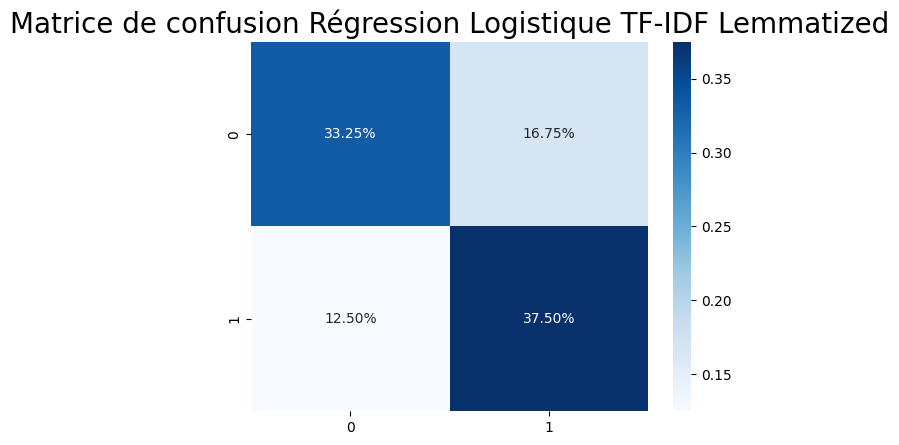

In [25]:
confusion_report_matrix("Matrice de confusion Régression Logistique TF-IDF Lemmatized", y_test_tfidf_lem, log_pred_tfidf_lem)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='log_tfidf_stem'>Régression Logistique modèle de base (TF-IDF avec Stemming)</a></center>

In [26]:
X_tfidf_stem = tfidf_dataframe_stemmed.values
y_tfidf_stem = data["target"].values

In [27]:
X_train_tfidf_stem, X_test_tfidf_stem, X_val_tfidf_stem, y_train_tfidf_stem, y_test_tfidf_stem, y_val_tfidf_stem = train_test_val_split(X_tfidf_stem, y_tfidf_stem)

In [28]:
log_tfidf_stem, log_pred_tfidf_stem, log_acc_tfidf_stem, time_training_tfidf_stem, tableau_score = Logistic_regression_model("Régression Logistique TF-IDF Stemmed", tableau_score, X_train_tfidf_stem, X_test_tfidf_stem, X_val_tfidf_stem, y_train_tfidf_stem, y_test_tfidf_stem, y_val_tfidf_stem)

2023/02/04 23:00:50 INFO mlflow.tracking.fluent: Experiment with name 'Régression Logistique TF-IDF Stemmed' does not exist. Creating a new experiment.


validation score :  0.65
test score :  0.685
Temps d'entraînement du modèle: 4.067567825317383


              precision    recall  f1-score   support

           0       0.70      0.65      0.67       200
           1       0.67      0.72      0.70       200

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.68       400
weighted avg       0.69      0.69      0.68       400



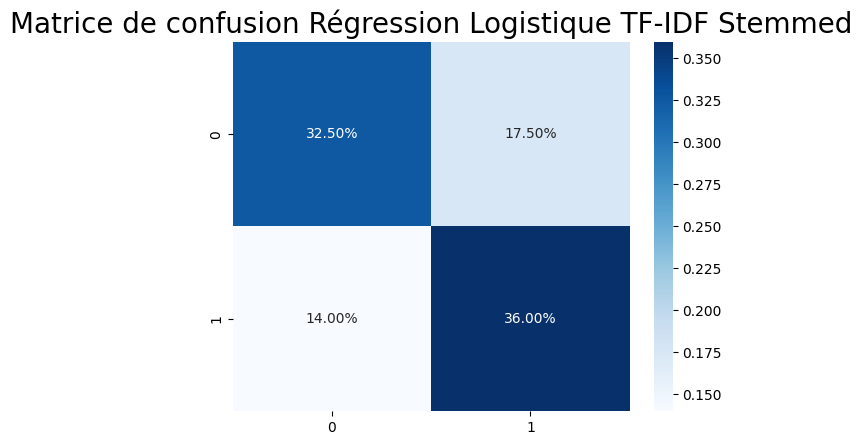

In [29]:
confusion_report_matrix("Matrice de confusion Régression Logistique TF-IDF Stemmed", y_test_tfidf_stem, log_pred_tfidf_stem)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='best_model'>Graphique AUC-ROC meilleur modèle</a></center>

Aléatoire: ROC AUC=0.500
Logistic: ROC AUC=0.758


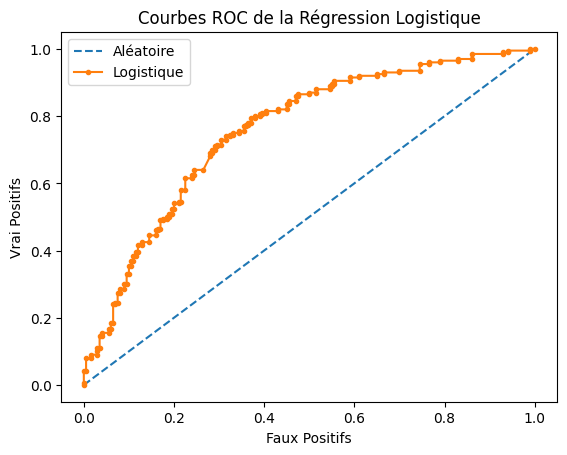

In [30]:
auc_roc_reg_log(log_tfidf_lem, X_test_tfidf_lem, y_test_tfidf_lem)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='shap_best_model'>SHAP du meilleur modèle</a></center>

In [31]:
explainer = shap.Explainer(log_tfidf_lem, X_train_tfidf_lem, feature_names=tfidf_features_lemmatised)
shap_values = explainer(X_test_tfidf_lem)

In [32]:
ind = 0
shap.plots.force(shap_values[ind], show = False)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


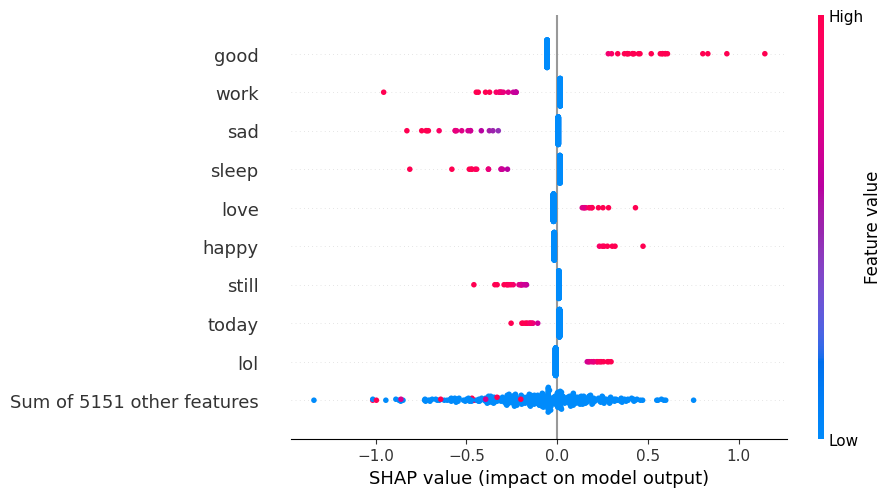

In [33]:
shap.plots.beeswarm(shap_values)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='score_board'>Tableau des scores</a></center>

In [34]:
tableau_score = pd.DataFrame(tableau_score)

In [35]:
tableau_score

,Nom du modèle,Temps d'entraînement,AUC-score_test,AUC-score_val,F1-score_test,F1-score_val,Précision-score_test,Précision-score_val,Rappel-score_test,Rappel-score_val,F-bêta-score_test,F-bêta-score_val,accuracy-score_test,accuracy-score_val
0,Régression Logistique Count Lemmatized,6.727824,0.6975,0.665625,0.701235,0.686217,0.692683,0.646409,0.71,0.73125,0.697529,0.666078,0.6975,0.665625
1,Régression Logistique Count Stemmed,4.274446,0.6875,0.637500,0.691358,0.658824,0.682927,0.622222,0.70,0.70000,0.687525,0.637626,0.6875,0.637500
2,Régression Logistique TF-IDF Lemmatized,4.132565,0.7075,0.675000,0.719424,0.704545,0.691244,0.645833,0.75,0.77500,0.707883,0.676314,0.7075,0.675000
3,Régression Logistique TF-IDF Stemmed,4.067568,0.6850,0.650000,0.695652,0.676301,0.672897,0.629032,0.72,0.73125,0.685189,0.650430,0.6850,0.650000


<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='mlflow'>Affichage de l'interface MLFlow</a></center>

In [36]:
connect_ngrock_local()

MLflow Tracking UI: https://a49b-2a01-e0a-47f-bd20-6915-4a52-2703-e171.ngrok.io


In [37]:
!mlflow ui

^C


<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

# <center><a id='conclusion'>Conclusion</a></center>

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>